In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import linear_model, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'Abalone.csv'))

In [3]:
df

,Gender,Length,Diameter,Height,Whole_weight,Shucked_weight,Vicera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15\
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7\
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9\
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10\
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7\
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11\
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10\
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9\
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10\


In [4]:
df.Rings

0       15\
1        7\
2        9\
3       10\
4        7\
       ... 
4172    11\
4173    10\
4174     9\
4175    10\
4176    12}
Name: Rings, dtype: object

In [38]:
df['Rings'] = df['Rings'].map(lambda x: int(x.rstrip('\}')))


In [39]:
df.Rings

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, dtype: int64

In [40]:
df

,Gender,Length,Diameter,Height,Whole_weight,Shucked_weight,Vicera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [72]:
df.info

<bound method DataFrame.info of      Gender  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0         M   0.455     0.365   0.095        0.5140          0.2245   
1         M   0.350     0.265   0.090        0.2255          0.0995   
2         F   0.530     0.420   0.135        0.6770          0.2565   
3         M   0.440     0.365   0.125        0.5160          0.2155   
4         I   0.330     0.255   0.080        0.2050          0.0895   
...     ...     ...       ...     ...           ...             ...   
4172      F   0.565     0.450   0.165        0.8870          0.3700   
4173      M   0.590     0.440   0.135        0.9660          0.4390   
4174      M   0.600     0.475   0.205        1.1760          0.5255   
4175      F   0.625     0.485   0.150        1.0945          0.5310   
4176      M   0.710     0.555   0.195        1.9485          0.9455   

      Vicera_weight  Shell_weight  Rings  
0            0.1010        0.1500     15  
1            0.0485        0.

In [73]:
df.var()

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole_weight       0.240481
Shucked_weight     0.049268
Vicera_weight      0.012015
Shell_weight       0.019377
Rings             10.395266
dtype: float64

In [41]:
#X = df[['Length', 'Diameter', 'Height','Whole_weight', 'Shucked_weight','Vicera_weight','Shell_weight']]
X = df.drop('Gender', axis= 1)

In [42]:
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Vicera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [43]:
y = df.Gender

In [44]:
y

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Gender, dtype: object

In [45]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
y_train

3141    I
3521    I
883     M
3627    M
2106    M
       ..
1033    M
3264    F
1653    M
2607    F
2732    I
Name: Gender, dtype: object

In [47]:
print len (X_train)
print len (X_test)
print len (y_train)
print len (y_test)

3341
836
3341
836


In [48]:
X_train.columns

Index([u'Length', u'Diameter', u'Height', u'Whole_weight', u'Shucked_weight',
       u'Vicera_weight', u'Shell_weight', u'Rings'],
      dtype='object')

In [50]:
X_train.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Vicera_weight,Shell_weight,Rings
Length,1.000000,0.986626,0.809545,0.925283,0.898074,0.901923,0.896668,0.551926
Diameter,0.986626,1.000000,0.815144,0.924761,0.892732,0.898102,0.903953,0.569614
Height,0.809545,0.815144,1.000000,0.802585,0.761996,0.780910,0.799362,0.533590
Whole_weight,0.925283,0.924761,0.802585,1.000000,0.969501,0.965920,0.953238,0.535350
Shucked_weight,0.898074,0.892732,0.761996,0.969501,1.000000,0.932480,0.879739,0.414353
Vicera_weight,0.901923,0.898102,0.780910,0.965920,0.932480,1.000000,0.904726,0.496502
Shell_weight,0.896668,0.903953,0.799362,0.953238,0.879739,0.904726,1.000000,0.625154
Rings,0.551926,0.569614,0.533590,0.535350,0.414353,0.496502,0.625154,1.000000


In [51]:
X_train.Rings.unique()

array([ 5,  3, 15, 10, 14, 11,  7, 19,  9, 12,  8, 13, 18, 16,  4,  6, 17,
       24, 22, 20,  2, 21, 23, 25, 27, 26,  1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b1ce650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ca85910>]], dtype=object)

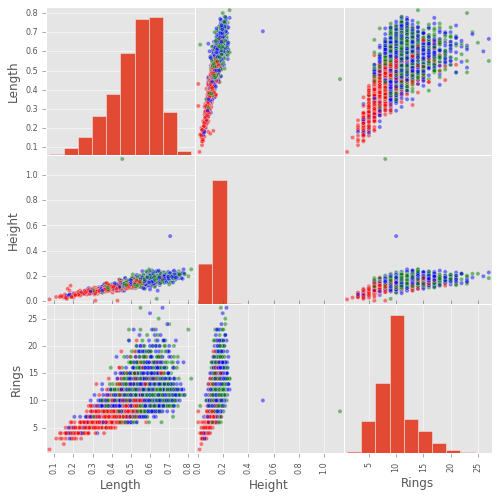

In [52]:
color_wheel = {"I": "red", 
               "M": "blue", 
               "F": "green"}
color = y_train.map(color_wheel)
pd.tools.plotting.scatter_matrix(X_train[['Length', 'Height', 'Rings']], c=color, s=70, figsize = (8,8))

In [65]:
feature = X_train[['Height', 'Length','Rings', 'Whole_weight' ]]
c = y_train
model = linear_model.LogisticRegression().\
    fit(feature, c)

In [66]:
model.score(feature, c)

0.54265190062855428

In [69]:
c_hat = model.predict(feature)
 
pd.crosstab(c_hat, c,
   rownames = ['Hypothesized Class'],
   colnames = ['True Class'])

True Class,F,I,M
Hypothesized Class,,,
F,70,7,64
I,186,858,283
M,802,186,885


In [70]:
feature_2 = X_train
c = y_train

model = linear_model.LogisticRegression().\
   fit(feature_2, c)

In [71]:
model.score(feature_2, c)

0.55402574079616884